In [8]:
import zarr
import xarray as xr
import matplotlib.pyplot as plt
import gzip
import pickle
import numpy as np
from scipy import interpolate

def interpol1d(X, p):
    
    h,lt,ln=np.shape(p)
    out=np.zeros((len(p_std),lt,ln))
    
    for i in range(lt):
        for j in range(ln):
            f = interpolate.interp1d(p[:,i,j], X[:,i,j])
            out[:,i,j]=f(p_std)
            
    return out

In [9]:
import numpy as np
import xarray as xr
from eofs.xarray import Eof

with gzip.open('/home/scratch/Abel_data/heat_indexv2', 'rb') as f:
    heat_index= pickle.load(f)
    
int_list=[]
dur_list=[]
for i in range(len(heat_index)):
    
    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    
cut=np.quantile(int_list,[0,0.1,0.45,0.55,0.9,1])
    
p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*10000
# with gzip.open('/home/scratch/Abel_data/rey_datv1', 'rb') as f:
#     convfh,convfh1,convfh2,convfv=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_datv2', 'rb') as f:
    convf,convv=pickle.load(f)

convt=np.array(convf)+np.array(convv)
# convt=np.array(convfv)+np.array(convfh1)+np.array(convfh2)+np.array(convfh)
# convt=np.array(convf)
len_arr=[0]
val=[]
for e in range(len(convt)):
    if (int_list[e]>=cut[0]  and int_list[e]<=cut[5]):
        len_arr.append(len(convt[e]))
        for i in convt[e]:
            val.append(i)

val=np.array(val)[:,:34]
# plt.plot(val[:5],p_std)
# plt.gca().invert_yaxis()
print(val.shape)

data_xr = xr.DataArray(val, dims=["time", "y"])
solver=Eof(data_xr)

eof1 = solver.eofs(neofs=2)
eof2 = solver.eofsAsCorrelation(neofs=2)
pc1 = solver.pcs(npcs=2)
var= solver.varianceFraction()
print(var.values[:])
print(eof1)
print(pc1)
print(solver.eigenvalues())

(8167, 34)
[6.56046914e-01 1.80170474e-01 9.60446039e-02 2.91284797e-02
 1.35797265e-02 1.06729731e-02 4.72617742e-03 3.49269764e-03
 1.69424704e-03 1.06542425e-03 7.41336922e-04 5.66791499e-04
 4.57187958e-04 3.30494490e-04 2.74802499e-04 2.00335295e-04
 1.80361784e-04 1.30346547e-04 1.12422957e-04 7.92374237e-05
 7.55580486e-05 6.21872703e-05 5.11838871e-05 3.15608162e-05
 2.83429997e-05 2.24621437e-05 1.86733442e-05 6.22828592e-06
 5.00921452e-06 1.47969396e-06 1.09094870e-06 6.81990372e-07
 4.54757662e-07 5.19876359e-08]
<xarray.DataArray 'eofs' (mode: 2, y: 34)>
array([[-6.98576624e-03, -2.33439869e-03, -3.92878087e-04,
         1.74742933e-03,  4.25194860e-03,  7.84288946e-03,
         1.63759375e-02,  2.63517472e-02,  6.93161054e-02,
         8.52389497e-02,  2.00090113e-01,  2.38436081e-01,
         2.39656856e-01,  2.51539156e-01,  2.64954910e-01,
         2.18327233e-01,  2.34807871e-01,  2.31580650e-01,
         2.23659441e-01,  2.41772693e-01,  2.23508107e-01,
         2.34

/tmp/ipykernel_2007169/2334515463.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  convt=np.array(convf)+np.array(convv)


<IPython.core.display.Javascript object>


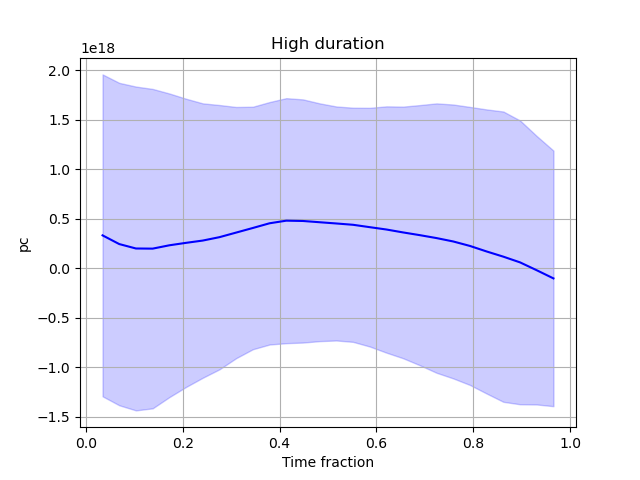

In [10]:
%matplotlib notebook
import matplotlib.pyplot as plt
len_cum=np.cumsum(len_arr)

with gzip.open('/home/scratch/Abel_data/heat_indexv2', 'rb') as f:
    heat_index= pickle.load(f)

int_list=[]
dur_list=[]
for i in range(len(heat_index)):
    
    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    
xx=[]
yy=[]

cut=np.quantile(dur_list,[0,0.1,0.45,0.55,0.9,1])
        
for i in range(len(len_cum)-1):
    if (dur_list[i]>=cut[4]  and dur_list[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(pc1[len_cum[i]:len_cum[i+1],0])))
        yy.append(pc1[len_cum[i]:len_cum[i+1],0])
        
#     plt.scatter(np.linspace(0,1,len(pc1[len_cum[i]:len_cum[i+1],0])),pc1[len_cum[i]:len_cum[i+1],0])
# plt.plot(eof1[0,:],p_std)
# plt.gca().invert_yaxis()

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))
        
    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
plt.plot(x_arr,mean_arr, color='blue')
plt.fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2,color='blue')
plt.xlabel('Time fraction')
plt.ylabel('pc')
plt.title('High duration')
plt.grid()

<IPython.core.display.Javascript object>


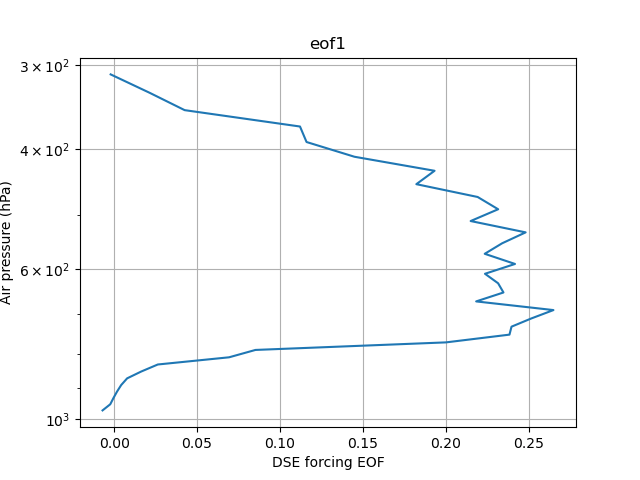

Text(0.5, 1.0, 'eof1')

In [11]:
plt.plot(eof1[0,:],p_std[:34]/100)
plt.gca().invert_yaxis()
plt.yscale('log')
plt.yticks([1000,600,400,300])
plt.grid()
plt.xlabel('DSE forcing EOF')
plt.ylabel('Air pressure (hPa)')
plt.title('eof1')

<IPython.core.display.Javascript object>


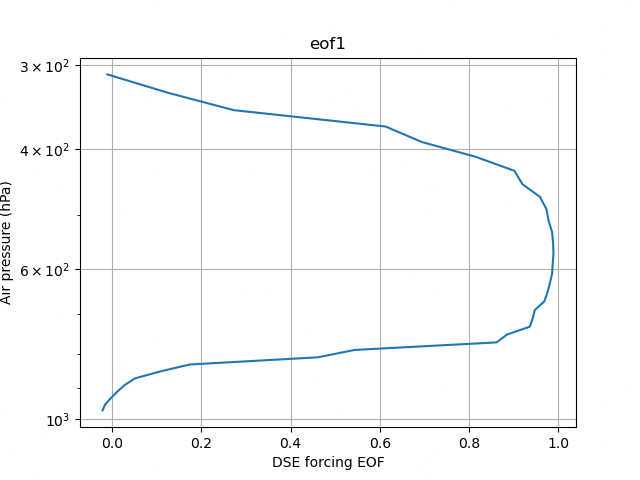

Text(0.5, 1.0, 'eof1')

In [12]:
plt.plot(eof2[0,:],p_std[:34]/100)
plt.gca().invert_yaxis()
plt.yscale('log')
plt.yticks([1000,600,400,300])
plt.grid()
plt.xlabel('DSE forcing EOF')
plt.ylabel('Air pressure (hPa)')
plt.title('eof1')

In [9]:
################################################### xtraa #######################################
import numpy as np
import xarray as xr
from eofs.xarray import Eof

with gzip.open('/home/scratch/Abel_data/heat_indexk', 'rb') as f:
    heat_index= pickle.load(f)
    
int_list=[]
dur_list=[]
for i in range(len(heat_index)):
    
    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    
cut=np.quantile(dur_list,[0,0.1,0.45,0.55,0.9,1])
    
p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*10000
with gzip.open('/home/scratch/Abel_data/rey_datk', 'rb') as f:
    convfh,convfh1,convfh2,convfv=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_datk', 'rb') as f:
    convf,convv=pickle.load(f)

convt=np.array(convf)+np.array(convv)
# convt=np.array(convfh2)
# convt=np.array(convfv)
len_arr=[0]
val=[]
lenc=0
for e in range(len(convt)):
    if (dur_list[e]>=cut[4]  and dur_list[e]<=cut[5]):
        for i in range(len(convt[e])):
            if i<=len(convt[e])/2:
                val.append(convt[e][i])
                lenc=lenc+1
        len_arr.append(lenc)
        lenc=0

val=np.array(val)[:,:34]
# plt.plot(val[:5],p_std)
# plt.gca().invert_yaxis()
print(val.shape)

data_xr = xr.DataArray(val, dims=["time", "y"])
solver=Eof(data_xr)

eof1 = solver.eofs(neofs=2)
eof2 = solver.eofsAsCorrelation(neofs=2)
pc1 = solver.pcs(npcs=2)
var= solver.varianceFraction()
print(var.values[:])
print(eof1)
print(pc1)
print(solver.eigenvalues())

(674, 34)
[5.16115888e-01 2.81365403e-01 1.18377292e-01 4.22426002e-02
 1.85178393e-02 8.14242242e-03 4.96446033e-03 4.34586811e-03
 1.64800142e-03 8.33477894e-04 7.28173540e-04 6.34086977e-04
 3.54669147e-04 3.38432551e-04 2.93548535e-04 2.34835817e-04
 1.97317789e-04 1.50633507e-04 1.24053794e-04 8.96655888e-05
 7.33610995e-05 5.08349638e-05 3.93322025e-05 3.33064309e-05
 2.89496887e-05 2.40510312e-05 2.19709762e-05 1.55384956e-05
 6.41710747e-06 4.32444067e-06 1.41100702e-06 1.03498634e-06
 6.54784351e-07 1.43509395e-07]
<xarray.DataArray 'eofs' (mode: 2, y: 34)>
array([[-0.32076374, -0.1528602 , -0.15614098, -0.1589191 , -0.16106991,
        -0.16191991, -0.16286684, -0.16362719, -0.16801503, -0.17253356,
        -0.19250927, -0.20043385, -0.19879127, -0.19679495, -0.19862015,
        -0.19037452, -0.18888585, -0.18806262, -0.18531746, -0.18396157,
        -0.17757569, -0.1769939 , -0.17718022, -0.1663569 , -0.16621424,
        -0.16034889, -0.14881603, -0.1461578 , -0.13262666, -0

/tmp/ipykernel_1667969/3112694721.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  convt=np.array(convf)+np.array(convv)


<IPython.core.display.Javascript object>


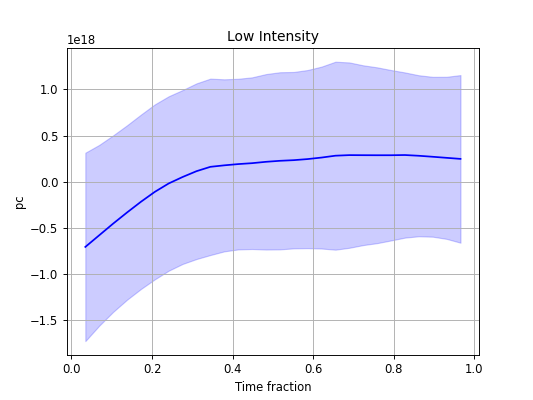

In [10]:
%matplotlib notebook
import matplotlib.pyplot as plt
len_cum=np.cumsum(len_arr)

with gzip.open('/home/scratch/Abel_data/heat_indexk', 'rb') as f:
    heat_index= pickle.load(f)

int_list=[]
dur_list=[]
for i in range(len(heat_index)):
    
    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    
xx=[]
yy=[]

cut=np.quantile(int_list,[0,0.1,0.45,0.55,0.9,1])
        
for i in range(len(len_cum)-1):
    if (int_list[i]>=cut[0]  and int_list[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(pc1[len_cum[i]:len_cum[i+1],0])))
        yy.append(pc1[len_cum[i]:len_cum[i+1],0])
        
#     plt.scatter(np.linspace(0,1,len(pc1[len_cum[i]:len_cum[i+1],0])),pc1[len_cum[i]:len_cum[i+1],0])
# plt.plot(eof1[0,:],p_std)
# plt.gca().invert_yaxis()

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))
        
    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
plt.plot(x_arr,mean_arr, color='blue')
plt.fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2,color='blue')
plt.xlabel('Time fraction')
plt.ylabel('pc')
plt.title('Low Intensity')
plt.grid()

<IPython.core.display.Javascript object>


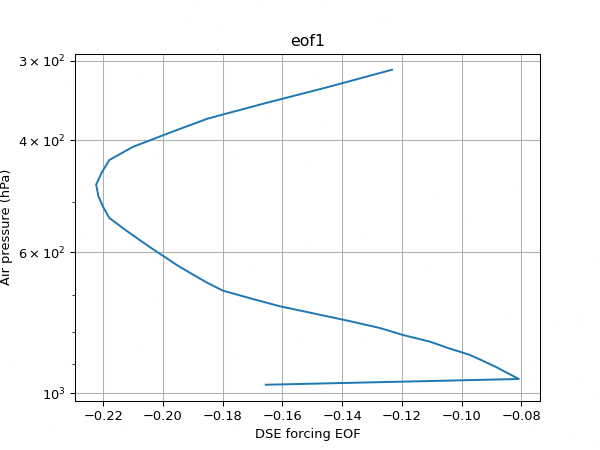

Text(0.5, 1.0, 'eof1')

In [50]:
plt.plot(eof1[0,:],p_std[:34]/100)
plt.gca().invert_yaxis()
plt.yscale('log')
plt.yticks([1000,600,400,300])
plt.grid()
plt.xlabel('DSE forcing EOF')
plt.ylabel('Air pressure (hPa)')
plt.title('eof1')

<IPython.core.display.Javascript object>


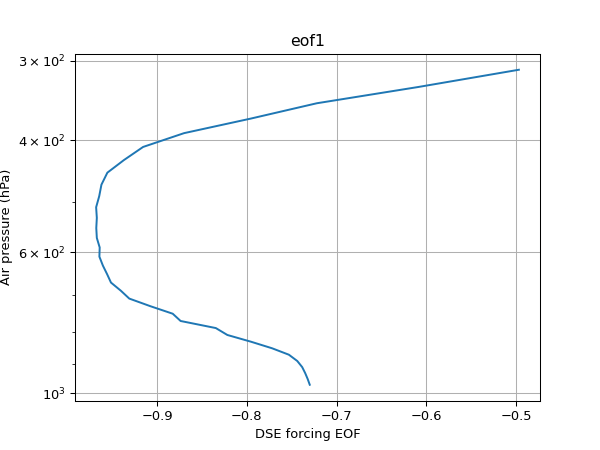

Text(0.5, 1.0, 'eof1')

In [51]:
plt.plot(eof2[0,:],p_std[:34]/100)
plt.gca().invert_yaxis()
plt.yscale('log')
plt.yticks([1000,600,400,300])
plt.grid()
plt.xlabel('DSE forcing EOF')
plt.ylabel('Air pressure (hPa)')
plt.title('eof1')